In [ ]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("Delhi climate report.csv")

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
df.shape

(1462, 5)

In [ ]:
1462*5

7310

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
df.meanpressure.describe()

,meanpressure
count,1462.000000
mean,1011.104548
std,180.231668
min,-3.041667
25%,1001.580357
50%,1008.563492
75%,1014.944901
max,7679.333333


In [ ]:
df_errors = df[(df['meanpressure'] < 900) | (df['meanpressure'] > 1200)]

In [ ]:
df_errors

,date,meantemp,humidity,wind_speed,meanpressure
1182,2016-03-28,25.933333,52.800000,6.546667,7679.333333
1309,2016-08-02,30.687500,72.125000,6.375000,310.437500
1321,2016-08-14,28.933333,83.700000,6.370000,633.900000
1323,2016-08-16,31.333333,66.416667,14.666667,-3.041667
1362,2016-09-24,31.240000,66.480000,5.496154,1352.615385
1416,2016-11-17,21.730769,51.730769,11.550000,1350.296296
1427,2016-11-28,22.454545,37.318182,9.185714,12.045455


In [ ]:
indices_to_drop = df_errors.index

In [ ]:
df_cleaned = df.drop(indices_to_drop)
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
df_cleaned

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1450,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1451,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1452,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1453,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df_cleaned.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1455.000000,1455.000000,1455.000000,1455.000000
mean,25.486006,60.768149,6.793566,1008.178187
std,7.359717,16.781011,4.565621,7.827299
min,6.000000,13.428571,0.000000,938.066667
25%,18.791667,50.343750,3.475000,1001.625000
50%,27.714286,62.625000,6.166667,1008.571429
75%,31.343750,72.250000,9.226471,1014.906250
max,38.714286,100.000000,42.220000,1023.000000


In [ ]:
df_cleaned.shape

(1455, 5)

In [ ]:
highest_pressure = df_cleaned['meanpressure'].max()
print(f"The highest recorded mean pressure is: {highest_pressure} hPa")

The highest recorded mean pressure is: 1023.0 hPa


In [ ]:
df_cleaned.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [ ]:
date_time = pd.to_datetime(df_cleaned.pop('date'))

In [ ]:
df_cleaned

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
1450,17.217391,68.043478,3.547826,1015.565217
1451,15.238095,87.857143,6.000000,1016.904762
1452,14.095238,89.666667,6.266667,1017.904762
1453,15.052632,87.000000,7.325000,1016.100000


In [ ]:
date_time

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1450,2016-12-28
1451,2016-12-29
1452,2016-12-30
1453,2016-12-31


In [ ]:
df_cleaned['date_time'] = date_time
df_cleaned

,meantemp,humidity,wind_speed,meanpressure,date_time
0,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,6.000000,86.833333,3.700000,1016.500000,2013-01-05
...,...,...,...,...,...
1450,17.217391,68.043478,3.547826,1015.565217,2016-12-28
1451,15.238095,87.857143,6.000000,1016.904762,2016-12-29
1452,14.095238,89.666667,6.266667,1017.904762,2016-12-30
1453,15.052632,87.000000,7.325000,1016.100000,2016-12-31


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

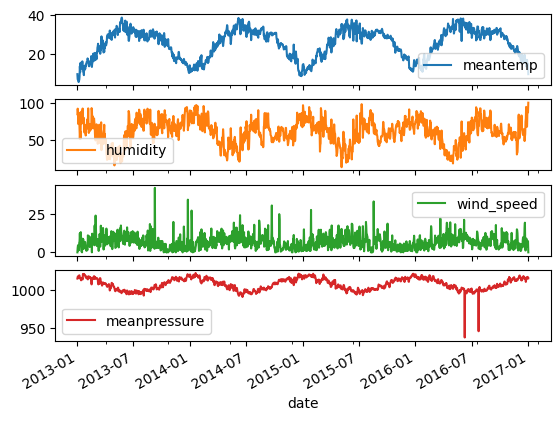

In [ ]:
plot_cols =['meantemp', 'humidity', 'wind_speed', 'meanpressure']
plot_features = df_cleaned[plot_cols]
plot_features.index = date_time
plot_features.plot(subplots=True)

In [ ]:
df_cleaned.shape

(1455, 5)

In [ ]:
df_cleaned

,meantemp,humidity,wind_speed,meanpressure,date_time
0,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,6.000000,86.833333,3.700000,1016.500000,2013-01-05
...,...,...,...,...,...
1450,17.217391,68.043478,3.547826,1015.565217,2016-12-28
1451,15.238095,87.857143,6.000000,1016.904762,2016-12-29
1452,14.095238,89.666667,6.266667,1017.904762,2016-12-30
1453,15.052632,87.000000,7.325000,1016.100000,2016-12-31


In [ ]:
test_df = pd.read_csv("DailyDelhiClimateTest.csv")
test_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [ ]:
date_time = pd.to_datetime(test_df.pop('date'))
test_df

,meantemp,humidity,wind_speed,meanpressure
0,15.913043,85.869565,2.743478,59.000000
1,18.500000,77.222222,2.894444,1018.277778
2,17.111111,81.888889,4.016667,1018.333333
3,18.700000,70.050000,4.545000,1015.700000
4,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000
110,34.250000,39.375000,6.962500,999.875000
111,32.900000,40.900000,8.890000,1001.600000
112,32.875000,27.500000,9.962500,1002.125000


In [ ]:
test_df['date_time'] = date_time

In [ ]:
test_df

,meantemp,humidity,wind_speed,meanpressure,date_time
0,15.913043,85.869565,2.743478,59.000000,2017-01-01
1,18.500000,77.222222,2.894444,1018.277778,2017-01-02
2,17.111111,81.888889,4.016667,1018.333333,2017-01-03
3,18.700000,70.050000,4.545000,1015.700000,2017-01-04
4,18.388889,74.944444,3.300000,1014.333333,2017-01-05
...,...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000,2017-04-20
110,34.250000,39.375000,6.962500,999.875000,2017-04-21
111,32.900000,40.900000,8.890000,1001.600000,2017-04-22
112,32.875000,27.500000,9.962500,1002.125000,2017-04-23


In [ ]:
val_df = df_cleaned[0:290]
train_df = df_cleaned[290:]

In [ ]:
val_df.shape

(290, 5)

In [ ]:
train_df.shape

(1165, 5)

In [ ]:
test_df.shape

(114, 5)

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean)/train_std
val_df = (val_df - train_mean)/train_std
test_df = (test_df - train_mean)/train_std

<ipython-input-38-b73edaee568e>:4: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  train_df = (train_df - train_mean)/train_std
<ipython-input-38-b73edaee568e>:5: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  val_df = (val_df - train_mean)/train_std
<ipython-input-38-b73edaee568e>:6: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  test_df = (test_df - train_mean)/train_std


In [ ]:
train_df

,meantemp,humidity,wind_speed,meanpressure,date_time
290,0.147976,0.767161,-1.448467,0.22052,-1.726361
291,-0.09071,0.544815,-0.985216,0.358046,-1.723398
292,-0.122965,0.437323,-1.108854,0.241913,-1.720436
293,-0.049585,0.17706,-1.144459,0.140296,-1.717473
294,0.346666,-0.442934,-1.448467,0.284698,-1.714511
...,...,...,...,...,...
1450,-1.086963,0.450319,-0.67112,0.87068,1.730844
1451,-1.355099,1.675689,-0.133837,1.042621,1.733806
1452,-1.509922,1.787599,-0.075409,1.170978,1.736769
1453,-1.380224,1.62268,0.156478,0.939323,1.739731


In [ ]:
val_df

,meantemp,humidity,wind_speed,meanpressure,date_time
0,-2.064705,1.468068,-1.448467,0.883701,-2.585477
1,-2.416928,1.931903,-0.795534,1.157531,-2.582515
2,-2.448538,1.62268,-0.43328,1.268775,-2.579553
3,-2.245332,0.653779,-1.178238,1.076238,-2.57659
4,-2.606586,1.612372,-0.637778,0.990666,-2.573628
...,...,...,...,...,...
285,0.260868,1.45776,-1.313352,-0.143161,-1.741173
286,0.335054,0.871708,-0.230869,-0.228733,-1.738211
287,0.083466,0.968893,-0.637778,0.04632,-1.735248
288,0.160878,0.880543,-1.448467,0.027983,-1.732286


In [ ]:
test_df

,meantemp,humidity,wind_speed,meanpressure,date_time
0,-1.263664,1.552768,-0.847357,-121.9119,1.742694
1,-0.913208,1.017976,-0.81428,1.218858,1.745656
2,-1.101361,1.306585,-0.568395,1.225989,1.748619
3,-0.886114,0.574412,-0.452635,0.88798,1.751581
4,-0.92826,0.877107,-0.72542,0.712558,1.754544
...,...,...,...,...,...
109,1.254316,-2.05708,-0.229695,-1.303729,2.065603
110,1.220449,-1.322675,0.077052,-1.143282,2.068566
111,1.037564,-1.228361,0.499377,-0.921865,2.071528
112,1.034177,-2.05708,0.734367,-0.854477,2.07449


In [ ]:
def make_sequence(df, sequence_length):
    X = []
    target = []
    for i in range(len(df) - sequence_length):
        s = df.iloc[i : i + sequence_length].values
        t = df.iloc[i + sequence_length, 0]
        X.append(s)
        target.append(t)
    return np.array(X), np.array(target)

In [ ]:
seq = 28
ds_train , target_train = make_sequence(train_df, sequence_length=seq)
ds_val , target_val = make_sequence(val_df ,sequence_length=seq)
ds_test , target_test = make_sequence(test_df, sequence_length=seq)
ds_train.shape , ds_val.shape , ds_test.shape

((1137, 28, 5), (262, 28, 5), (86, 28, 5))

In [ ]:
print("Training Dataset Shape:", ds_train.shape)
print("Training Target Shape:", target_train.shape)
print("Validation Dataset Shape:", ds_val.shape)
print("Validation Target Shape:", target_val.shape)
print("Test Dataset Shape:", ds_test.shape)
print("Test Target Shape:", target_test.shape)

Training Dataset Shape: (1137, 28, 5)
Training Target Shape: (1137,)
Validation Dataset Shape: (262, 28, 5)
Validation Target Shape: (262,)
Test Dataset Shape: (86, 28, 5)
Test Target Shape: (86,)


In [ ]:
ds_train = np.array(ds_train, dtype=np.float32)
target_train = np.array(target_train, dtype=np.float32)
ds_val = np.array(ds_val, dtype=np.float32)
target_val = np.array(target_val, dtype=np.float32)
ds_test = np.array(ds_test, dtype=np.float32)
target_test = np.array(target_test, dtype=np.float32)

In [ ]:
print("Training Features Shape:", ds_train.shape)
print("Training Target Shape:", target_train.shape)
print("Validation Features Shape:", ds_val.shape)
print("Validation Target Shape:", target_val.shape)
print("Test Features Shape:", ds_test.shape)
print("Test Target Shape:", target_test.shape)

print("\nData Types:")
print("Training Features Data Type:", ds_train.dtype)
print("Training Target Data Type:", target_train.dtype)
print("Validation Features Data Type:", ds_val.dtype)
print("Validation Target Data Type:", target_val.dtype)
print("Test Features Data Type:", ds_test.dtype)
print("Test Target Data Type:", target_test.dtype)

Training Features Shape: (1137, 28, 5)
Training Target Shape: (1137,)
Validation Features Shape: (262, 28, 5)
Validation Target Shape: (262,)
Test Features Shape: (86, 28, 5)
Test Target Shape: (86,)

Data Types:
Training Features Data Type: float32
Training Target Data Type: float32
Validation Features Data Type: float32
Validation Target Data Type: float32
Test Features Data Type: float32
Test Target Data Type: float32


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(ds_train.shape[1], ds_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(ds_train, target_train,
                    validation_data=(ds_val, target_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])
test_loss = model.evaluate(ds_test, target_test, verbose=1)
print(f'Test Loss: {test_loss}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.5869 - val_loss: 0.1116
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1263 - val_loss: 0.1117
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1185 - val_loss: 0.1115
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1240 - val_loss: 0.0864
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1000 - val_loss: 0.0887
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0972 - val_loss: 0.0752
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0972 - val_loss: 0.0823
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0953 - val_loss: 0.0836
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0930 - val_loss: 0.0829
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0934 - val_loss: 0.0771
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0848 - val_loss: 0.0672
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Make predictions on the test set
predictions = model.predict(ds_test)

# Calculate additional metrics
mae = mean_absolute_error(target_test, predictions)
mape = mean_absolute_percentage_error(target_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
Mean Absolute Error: 0.2766511142253876
Mean Absolute Percentage Error: 1.0193198919296265


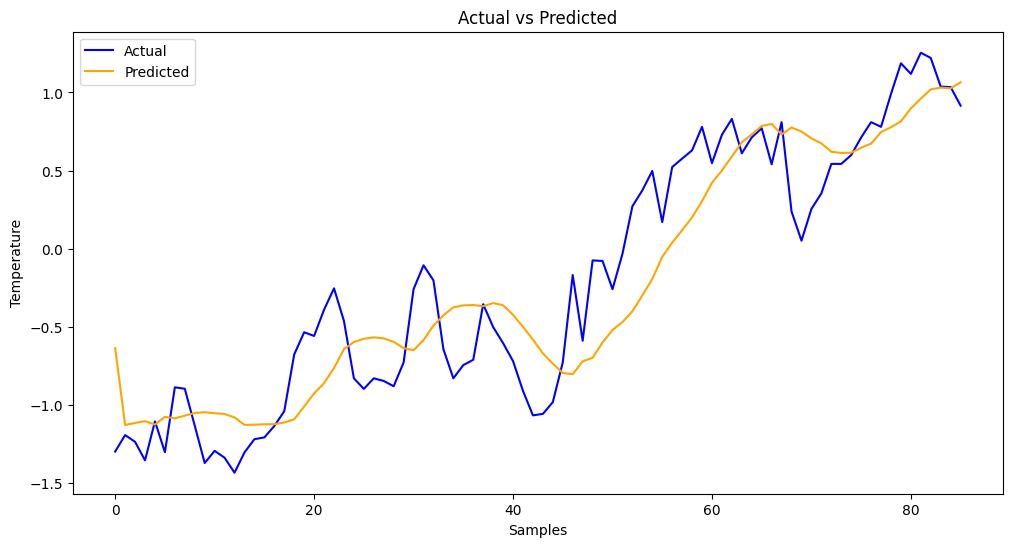

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(target_test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='orange')
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()